As we mentioned in [our notebook on Basic Clustering Evaluation Metrics](https://napsterinblue.github.io/notes/machine_learning/unsupervised/basic_evaluation_metrics/), the Silhouette Score is a pretty robust tool to determine the appropriate number of clusters generated from an Unsupervised Algorithm.

However, months later, I stumbled across [another post buried in the sklearn docs](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) that further elaborated on more fine-tuned inspection of your data and where the model over-under performs. This notebook gives an overview of reading the plots, and highlights some of the tricks in generating them.

## Motivation

Recall that the formula for a point's Silhouette Coeffient is represented by the following:

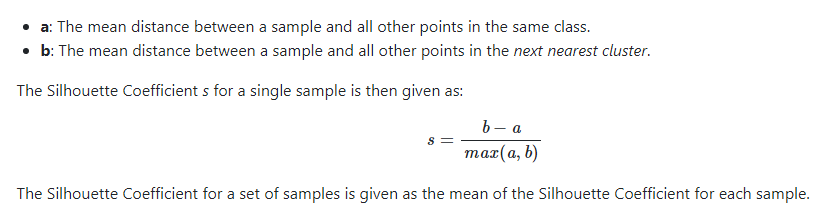

In [1]:
from IPython.display import Image
Image('images/silhouette.PNG')

And that optimizing for the highest value of `s` means simultaneously achieving the following objectives:

* maximizing `b`, and thus maximizing cross-class separability
* minimizing `a`, and thus favoring tightly-packed clusters
* dividing by `max(a, b)`, to normalize our numerator by whatever we're good at, so we don't overly value separability or centroid tightness.

So, if we do our usual routine of generating some sample data that we want to cluster on

Populating the interactive namespace from numpy and matplotlib


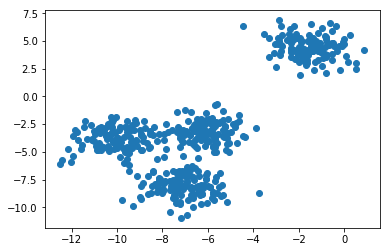

In [2]:
%pylab inline

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

plt.scatter(X[:, 0], X[:, 1]);

And fit a simple `KMeans` to it

In [3]:
n_clusters = 3

clusterer = KMeans(n_clusters=n_clusters, random_state=10)
cluster_labels = clusterer.fit_predict(X)

We can visualize how the algorithm partitioned our data.

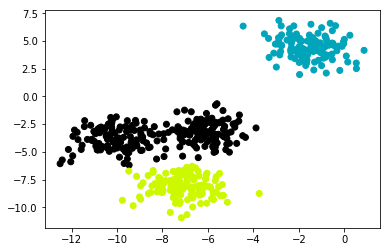

In [4]:
fig, ax = plt.subplots()

colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax.scatter(X[:, 0], X[:, 1], c=colors);

### Reading the Plots

I've tucked the implementation away into a helper function [here](https://github.com/NapsterInBlue/notes/tree/master/content/machine_learning/unsupervised/utils.py).

What I want to highlight, for the sake of reading, is this left plot that accompanies the one we generated above.

First thing to point out is that the average silhouette score printed out before the figure matches the vertical red line, giving us an idea of how well our data scores, across the board.

Additionally, we've got these different-colored sections of the graph. These are each of the different points of `X`, grouped into their predicted clusters. They're sorted by their individual silhouette scores from smallest to largest and then plotted.

* Their `y` values have no direct bearing on the interpretation, apart from separating the classes from one another. In fact, under the hood, the plotter is plotting from the y-axis, left to right-- not from the x-axis, bottom to top, as we expect by default.

* As far as the `x` values go, recall that a silhouette score ranges between `-1`, mislabel, to `1`, perfect fit. Therefore, we can see that group `1` achieves a high degree of cross-class separability and within-class tightness.

* The plotter starts at the bottom of a class group and plots its lowest score first (hence why you see *negative* values for the `0` class), progressively plotting better and better scores, creating the curvature you can see for each class.

It's important to note that this figure would suggest that the `0` class doesn't enjoy as good a silhouette score, on average, as the other two classes and thus might not be a very good fit. Therefore, we might suspect that `n_clusters=3` isn't a good fit to our data.

Average silhouette score: 0.5882004012129721


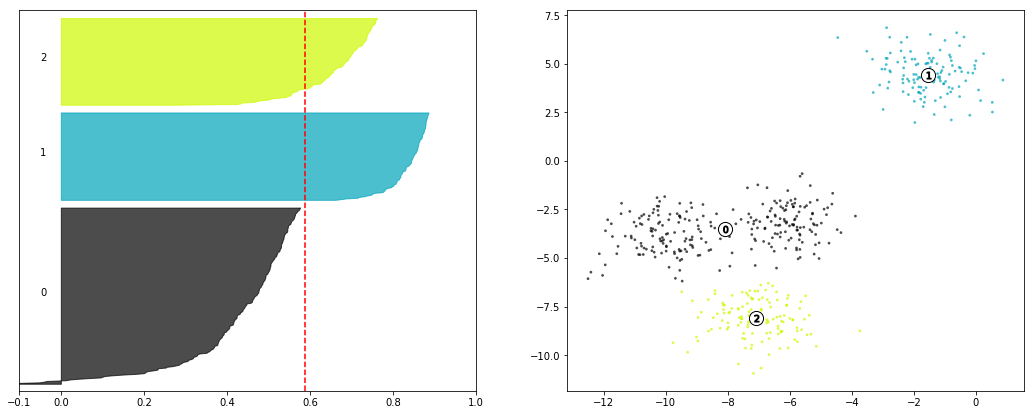

In [5]:
from utils import make_silhouette_plot

make_silhouette_plot(X, n_clusters=3)

Compare this to `n_clusters=4`, which achieves a better score than `3`, as evidenced both by the printout as well as the dashed, red line being further to the right than the previous plot.

The cluster in the top-right still out-performs the other clusters by a good margin, but the new clustering scheme has smoothed out the performance of the other three.

Average silhouette score: 0.6505186632729437


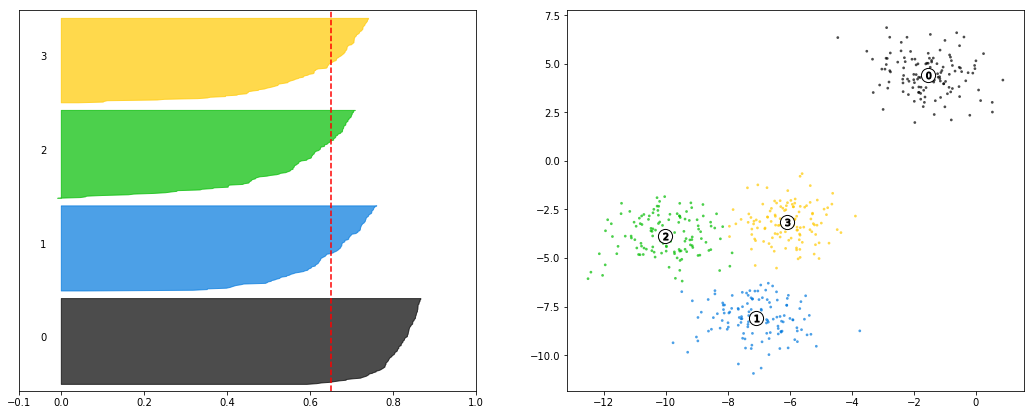

In [6]:
make_silhouette_plot(X, n_clusters=4)

Finally, if we look at the `n_clusters=2` case, we can see that the scores are higher on average, and that the obvious case performs even stronger than in previous implementations.

The decision between 2 and 4 clusters comes down to application of the model at this point, as both are solid candidates.

Average silhouette score: 0.7049787496083262


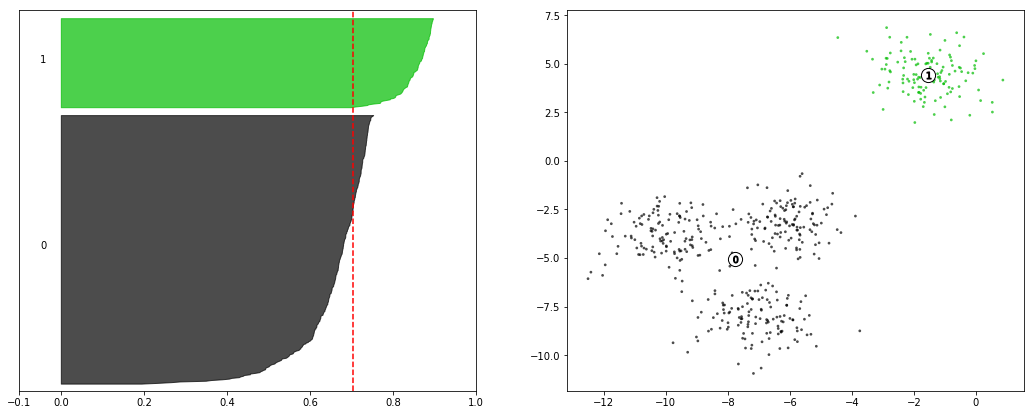

In [7]:
make_silhouette_plot(X, n_clusters=2)

Finally, compare this to the clearly-worse `n_clusters-8` to see that multiple classes have points with negative silhouette scores, there is no clear "best in class" cluster to anchor our intuitive understanding, and the "gradual-ness" of each curve would suggest that the model isn't very confident in this separation-- in fact, it's not likely that we'd even see these same clusters if we had used a different seed to power the initial Mean selection.

Average silhouette score: 0.32799178719839805


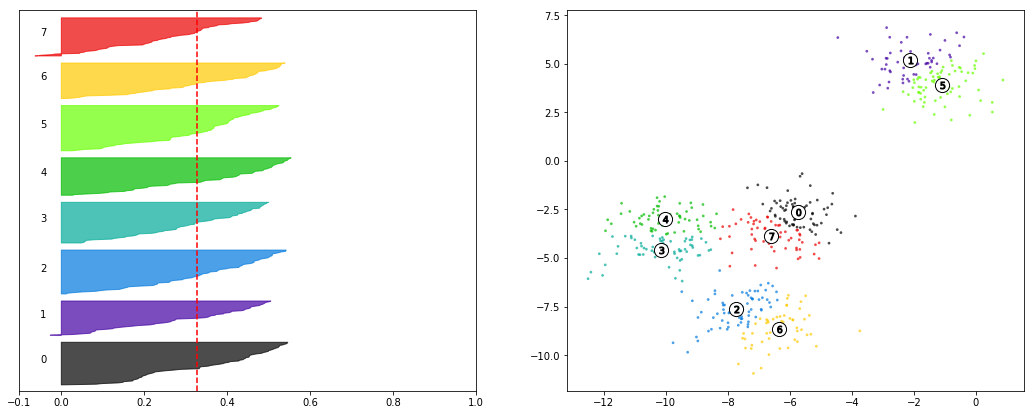

In [8]:
make_silhouette_plot(X, n_clusters=8)